### Importing dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler
import joblib

### Loading the dataset

In [2]:
df=pd.read_csv('fish.csv')

In [3]:
df.head()

Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [5]:
df.describe()

Weight     Length1     Length2     Length3      Height       Width
count   159.000000  159.000000  159.000000  159.000000  159.000000  159.000000
mean    398.326415   26.247170   28.415723   31.227044    8.970994    4.417486
std     357.978317    9.996441   10.716328   11.610246    4.286208    1.685804
min       0.000000    7.500000    8.400000    8.800000    1.728400    1.047600
25%     120.000000   19.050000   21.000000   23.150000    5.944800    3.385650
50%     273.000000   25.200000   27.300000   29.400000    7.786000    4.248500
75%     650.000000   32.700000   35.500000   39.650000   12.365900    5.584500
max    1650.000000   59.000000   63.400000   68.000000   18.957000    8.142000

In [6]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [7]:
df.duplicated().sum()

0

### Visualizing the data

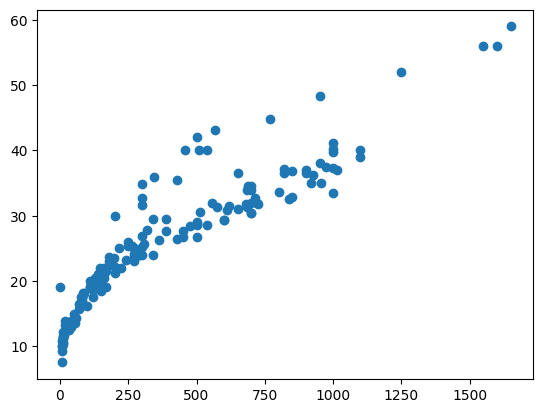

In [8]:
plt.scatter(x="Weight",y="Length1",data=df)
plt.show()

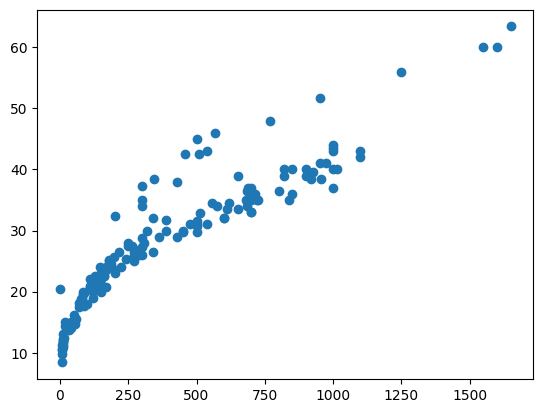

In [9]:
plt.scatter(x="Weight",y="Length2",data=df)
plt.show()

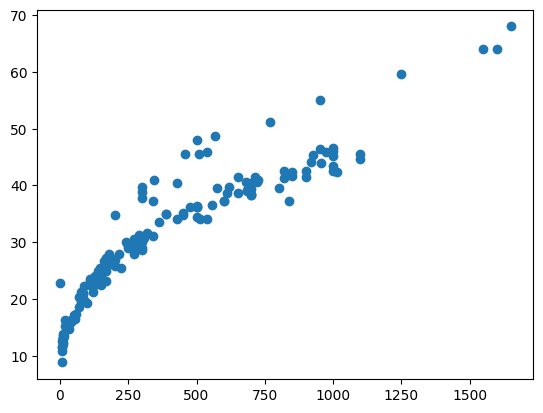

In [10]:
plt.scatter(x="Weight",y="Length3",data=df)
plt.show()

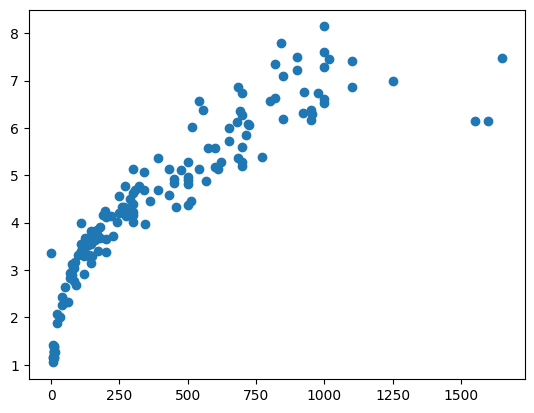

In [11]:
plt.scatter(x="Weight",y="Width",data=df)
plt.show()

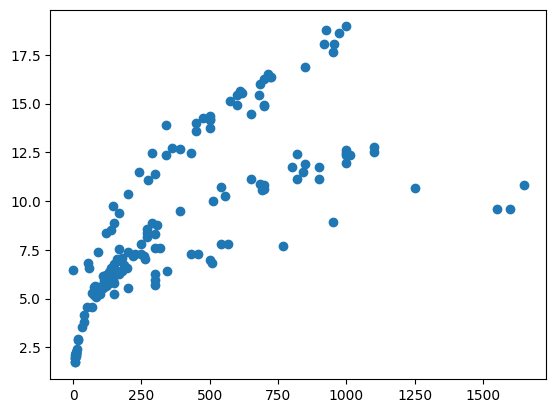

In [12]:
plt.scatter(x="Weight",y="Height",data=df)
plt.show()

### Handling the object column

In [13]:
le = LabelEncoder()
df['Species_encoded'] = le.fit_transform(df['Species'])

In [14]:
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Species          159 non-null    object 
 1   Weight           159 non-null    float64
 2   Length1          159 non-null    float64
 3   Length2          159 non-null    float64
 4   Length3          159 non-null    float64
 5   Height           159 non-null    float64
 6   Width            159 non-null    float64
 7   Species_encoded  159 non-null    int32  
dtypes: float64(6), int32(1), object(1)
memory usage: 9.4+ KB


In [16]:
df=df.drop(['Species'],axis=1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Weight           159 non-null    float64
 1   Length1          159 non-null    float64
 2   Length2          159 non-null    float64
 3   Length3          159 non-null    float64
 4   Height           159 non-null    float64
 5   Width            159 non-null    float64
 6   Species_encoded  159 non-null    int32  
dtypes: float64(6), int32(1)
memory usage: 8.2 KB


In [18]:
df.head()

Weight  Length1  Length2  Length3   Height   Width  Species_encoded
0   242.0     23.2     25.4     30.0  11.5200  4.0200                0
1   290.0     24.0     26.3     31.2  12.4800  4.3056                0
2   340.0     23.9     26.5     31.1  12.3778  4.6961                0
3   363.0     26.3     29.0     33.5  12.7300  4.4555                0
4   430.0     26.5     29.0     34.0  12.4440  5.1340                0

### Removing the outliers

In [19]:
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df))
threshold = 3
df_clean = df[(z_scores < threshold).all(axis=1)]

### Training the model

In [20]:
X= df_clean.drop(['Weight'],axis=1)
Y=df_clean['Weight']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = model.predict(X_test)

In [24]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 8336.192904502052
R-squared: 0.9202567948572947


In [25]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 73.33138348038102


### Standardizing the data

In [27]:
# Standard scaling the data
scaler = StandardScaler()

In [28]:
df.columns

Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width',
       'Species_encoded'],
      dtype='object')

In [33]:
df[['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width','Species_encoded']]=scaler.fit_transform(df[['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width','Species_encoded']])

In [34]:
df.head()

Weight   Length1   Length2   Length3    Height     Width  Species_encoded
0 -0.438072 -0.305789 -0.282303 -0.106020  0.596579 -0.236529         -1.33273
1 -0.303562 -0.225507 -0.198054 -0.002337  0.821261 -0.066579         -1.33273
2 -0.163448 -0.235542 -0.179332 -0.010977  0.797341  0.165793         -1.33273
3 -0.098995  0.005302  0.054694  0.196390  0.879771  0.022621         -1.33273
4  0.088759  0.025372  0.054694  0.239592  0.812835  0.426371         -1.33273

In [35]:
X= df.drop(['Weight'],axis=1)
Y=df['Weight']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [37]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [38]:
y_pred = model.predict(X_test)

In [39]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.10780230864937543
R-squared: 0.9034878699241474


In [40]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.27265710707403384


In [41]:
joblib.dump(model,'FishWeightPrediction.joblib')

['FishWeightPrediction.joblib']